# A/B Testing Example

We will now run through the steps in A/B testing through an example. Consider the following scenario: Cal, a student at UC Berkeley, is signing up for classes and gets to decide between taking his Data Science class in the morning or in the afternoon. He has heard from some students that students in the afternoon class get better grades on their finals. Cal wants to determine whether there is truly a difference between the distributions of students in the morning classes and the afternoon classes, or whether this difference he observed was due to the people he talked to (random chance).

In [38]:
%matplotlib inline

from datascience import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Data:
Cal has randomly asked students in the morning class and the afternoon class about their grade on the final. He collected this data in a table called classes. 

In [39]:
classes = Table.read_table('grades.csv')
classes

Time,Score
am,73.9
am,75.9
am,79.8
am,76.5
am,76.4
am,82
am,74.5
am,81.3
am,77.1
am,82.3


In [40]:
classes.group('Time', np.average)

Time,Score average
am,77.9286
pm,75.0176


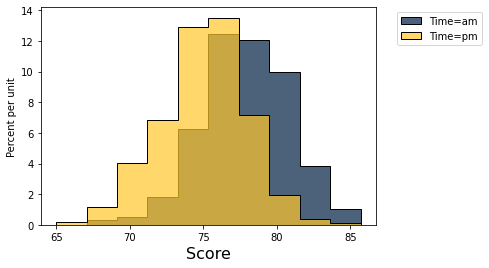

In [41]:
classes.hist('Score', group='Time')

## 1. Formulate hypotheses.

Null hypothesis:

Alternative hypothesis:

## 2. Define test statistic.

Test statistic = avg morning grade - avg afternoon grade

## 3. Calculate observed value of the test statistic.

In [42]:
means_table = classes.group('Time', np.average)
means_table

Time,Score average
am,77.9286
pm,75.0176


In [43]:
observed_stat = means_table.column('Score average')[0] - means_table.column('Score average')[1]
observed_stat

2.9110000000000014

## 4. Simulate test statistic under the null hypothesis.

In [44]:
## Shuffle the labels

shuffled = classes.sample(with_replacement = False).column(0)
tbl_w_shuffled = classes.with_column('Shuffled Label', shuffled)
tbl_w_shuffled

Time,Score,Shuffled Label
am,73.9,am
am,75.9,am
am,79.8,am
am,76.5,pm
am,76.4,am
am,82,pm
am,74.5,am
am,81.3,pm
am,77.1,pm
am,82.3,pm


In [45]:
## Calculate the test statistic with these shuffled labels
shuffled_tbl = tbl_w_shuffled.drop('Time')
shuffled_group_means = shuffled_tbl.group('Shuffled Label', np.average)
shuffled_group_means

Shuffled Label,Score average
am,76.4098
pm,76.5364


In [46]:
## Create a function to do this process many times

def calculate_test_stat(tbl, label, group_label):
    shuffled = tbl.sample(with_replacement = False).column(group_label)
    tbl_w_shuffled = tbl.select(label).with_column('Shuffled Label', shuffled)
    means_table = tbl_w_shuffled.group('Shuffled Label', np.average)
    diff = means_table.column('Score average')[0] - means_table.column('Score average')[1]
    return diff

In [47]:
calculate_test_stat(classes, 'Score', 'Time')

0.4602000000000004

In [48]:
## How can we do this process many times and store the simulated test stat each time?
## This will help us to understand the variance of the test statistic

diffs = make_array()

repetitions = 5000 
for i in np.arange(repetitions):
    new_diff = calculate_test_stat(classes, 'Score', 'Time')
    diffs = np.append(diffs, new_diff)                               

diffs

array([-0.1898,  0.1346, -0.1758, ...,  0.2078, -0.5314, -0.1566])

## 5. Make a conclusion.

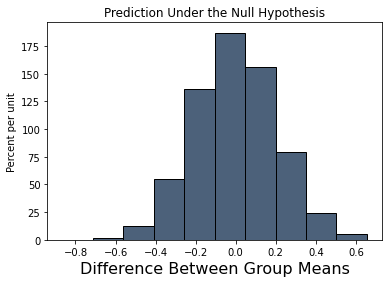

In [49]:
## Plot the distribution of the simulated test statistics.

Table().with_column('Difference Between Group Means', diffs).hist()
plt.title('Prediction Under the Null Hypothesis');

In [37]:
## Calculate the p-value

p_val = np.count_nonzero(diffs >= observed_stat) / repetitions
p_val

0.0